Ahora que sabemos cómo instalar bibliotecas, exploremos la simplicidad de Python en términos de llevar a cabo tareas razonablemente complejas.

Tenemos un archivo CSV con datos de llegada y salida de vuelos de los principales aeropuertos de EE. UU. de julio de 2019. Los datos han sido obtenidos del sitio web del Departamento de Transporte de EE. UU. (https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236).

El archivo tiene más de medio millón de filas. A continuación, se muestra un fragmento parcial del conjunto de datos:

In [7]:
#from google.colab import files

# Subir el archivo zip
#uploaded = files.upload()


In [8]:
'''import zipfile
import os

# Nombre del archivo zip (reemplaza 'nombre_del_archivo.zip' con el nombre del archivo que subiste)
zip_file_name = 'flight_data.zip'

# Extraer el archivo
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_files')  # Extrae el contenido a la carpeta 'extracted_files'

# Verificar el contenido de la carpeta extraída
print("Archivos extraídos:")
print(os.listdir('/content/extracted_files'))
'''

'import zipfile\nimport os\n\n# Nombre del archivo zip (reemplaza \'nombre_del_archivo.zip\' con el nombre del archivo que subiste)\nzip_file_name = \'flight_data.zip\'\n\n# Extraer el archivo\nwith zipfile.ZipFile(zip_file_name, \'r\') as zip_ref:\n    zip_ref.extractall(\'/content/extracted_files\')  # Extrae el contenido a la carpeta \'extracted_files\'\n\n# Verificar el contenido de la carpeta extraída\nprint("Archivos extraídos:")\nprint(os.listdir(\'/content/extracted_files\'))\n'

In [9]:
import os 
print(os.getcwd())

d:\Ciencia_de_datos_Tests\Codigo


In [10]:
import pandas as pd
file_path = '../Datos/flight_data.csv'
df_path = pd.read_csv(file_path)
df_path.head(2)



,YEAR,MONTH,DAY,CARRIER,ORIGIN,DEST,SCHED_DEP_TIME,ACT_DEP_TIME,DEP_DELAY,SCHED_ARR_TIME,ACT_ARR_TIME,ARR_DELAY
0,2019,7,24,G4,PIE,AVL,1511,1533.0,22.0,1644,1659.0,15.0
1,2019,7,29,G4,AUS,SFB,2002,2010.0,8.0,2335,2344.0,9.0


In [11]:
df_path.shape

(659029, 12)

In [12]:
df_path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659029 entries, 0 to 659028
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   YEAR            659029 non-null  int64  
 1   MONTH           659029 non-null  int64  
 2   DAY             659029 non-null  int64  
 3   CARRIER         659029 non-null  object 
 4   ORIGIN          659029 non-null  object 
 5   DEST            659029 non-null  object 
 6   SCHED_DEP_TIME  659029 non-null  int64  
 7   ACT_DEP_TIME    646817 non-null  float64
 8   DEP_DELAY       646815 non-null  float64
 9   SCHED_ARR_TIME  659029 non-null  int64  
 10  ACT_ARR_TIME    645942 non-null  float64
 11  ARR_DELAY       643781 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 60.3+ MB


In [13]:
#Verificar si tiene datos nullos
df_path.isnull().sum()

YEAR                  0
MONTH                 0
DAY                   0
CARRIER               0
ORIGIN                0
DEST                  0
SCHED_DEP_TIME        0
ACT_DEP_TIME      12212
DEP_DELAY         12214
SCHED_ARR_TIME        0
ACT_ARR_TIME      13087
ARR_DELAY         15248
dtype: int64

In [14]:
df_path.describe(include='all')

,YEAR,MONTH,DAY,CARRIER,ORIGIN,DEST,SCHED_DEP_TIME,ACT_DEP_TIME,DEP_DELAY,SCHED_ARR_TIME,ACT_ARR_TIME,ARR_DELAY
count,659029.0,659029.0,659029.000000,659029,659029,659029,659029.000000,646817.000000,646815.000000,659029.000000,645942.000000,643781.000000
unique,NaN,NaN,NaN,17,356,356,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,WN,ATL,ATL,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,119342,35364,35362,NaN,NaN,NaN,NaN,NaN,NaN
mean,2019.0,7.0,16.286881,NaN,NaN,NaN,1335.977465,1335.901689,14.191489,1475.831364,1440.047472,8.729063
std,0.0,0.0,8.855734,NaN,NaN,NaN,499.842522,520.110819,55.729509,531.989548,561.825977,57.523158
min,2019.0,7.0,1.000000,NaN,NaN,NaN,5.000000,1.000000,-66.000000,1.000000,1.000000,-88.000000
25%,2019.0,7.0,9.000000,NaN,NaN,NaN,912.000000,909.000000,-5.000000,1051.000000,1028.000000,-14.000000
50%,2019.0,7.0,16.000000,NaN,NaN,NaN,1325.000000,1324.000000,-2.000000,1509.000000,1448.000000,-6.000000
75%,2019.0,7.0,24.000000,NaN,NaN,NaN,1745.000000,1753.000000,9.000000,1922.000000,1915.000000,9.000000


In [15]:
#Separacion de variables categoricas y variables numericas
variables_categoricas = df_path.select_dtypes(include=['object']).columns
variables_numericas = df_path.select_dtypes(include=['int64', 'float64']).columns

In [16]:
print(variables_categoricas)
print(variables_numericas)

Index(['CARRIER', 'ORIGIN', 'DEST'], dtype='object')
Index(['YEAR', 'MONTH', 'DAY', 'SCHED_DEP_TIME', 'ACT_DEP_TIME', 'DEP_DELAY',
       'SCHED_ARR_TIME', 'ACT_ARR_TIME', 'ARR_DELAY'],
      dtype='object')


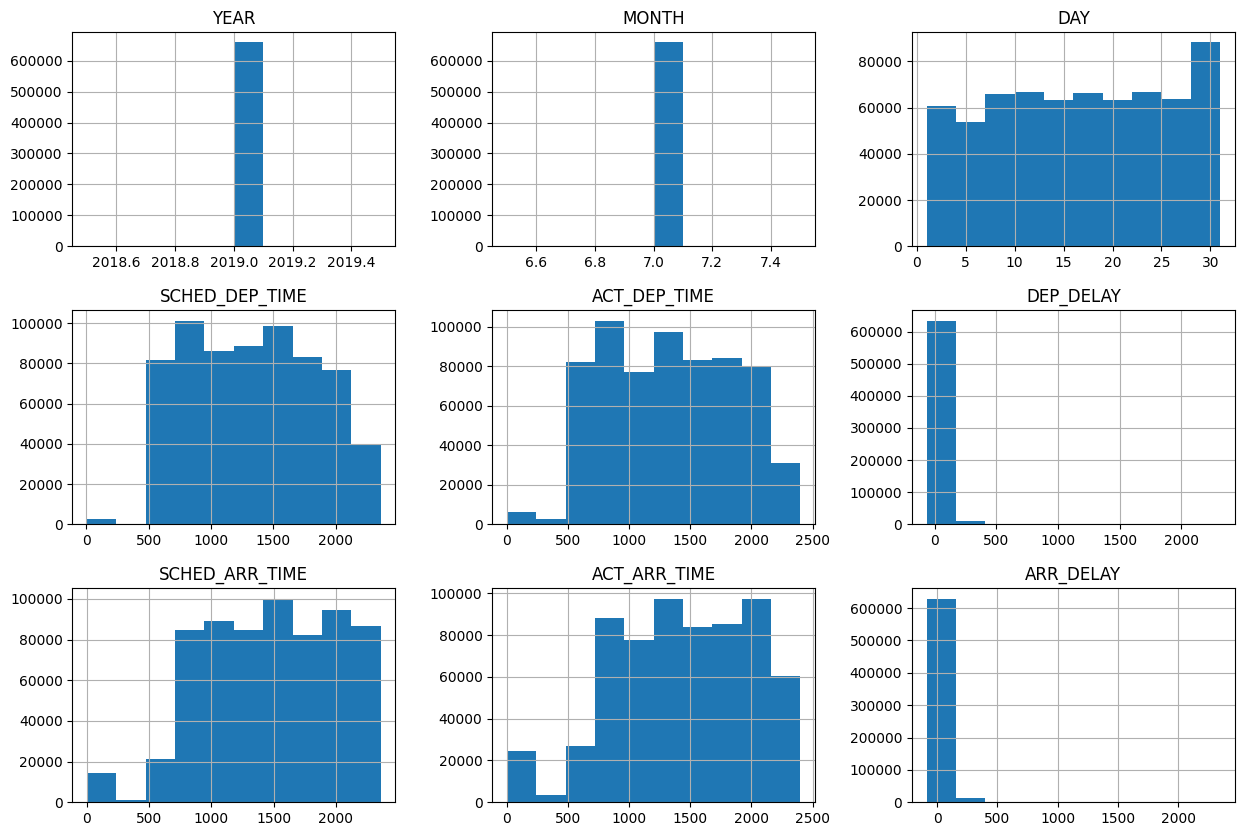

In [17]:
#distribucion variables numericas
import matplotlib.pyplot as plt
import seaborn as sns
df_path[variables_numericas].hist(figsize=(15,10))
plt.show()

In [18]:
df_path.head(2)

,YEAR,MONTH,DAY,CARRIER,ORIGIN,DEST,SCHED_DEP_TIME,ACT_DEP_TIME,DEP_DELAY,SCHED_ARR_TIME,ACT_ARR_TIME,ARR_DELAY
0,2019,7,24,G4,PIE,AVL,1511,1533.0,22.0,1644,1659.0,15.0
1,2019,7,29,G4,AUS,SFB,2002,2010.0,8.0,2335,2344.0,9.0


In [19]:
#Agregar columba que tenga encuenta los vuelos que tienen retrazo
df_path['Retraso'] = df_path['DEP_DELAY'] > 0
df_path['Retraso'] = df_path['Retraso'].astype(int)
df_path['Retraso'].value_counts(normalize=True)

Retraso
0    0.63518
1    0.36482
Name: proportion, dtype: float64

In [20]:
df_path['Retraso_A'] = df_path['ARR_DELAY'] > 0
df_path['Retraso_A'] = df_path['Retraso_A'].astype(int)
df_path['Retraso_A'].value_counts(normalize=True)

Retraso_A
0    0.650908
1    0.349092
Name: proportion, dtype: float64

# Actividad 0

1 - Construir un analisis descriptivo básico de la información en grupos de 5 personas

## Utilidad de Python en NLP
Aprender un nuevo idioma no es fácil. Para una persona promedio, puede tomar meses o incluso años alcanzar un nivel intermedio de fluidez en un nuevo idioma. Requiere comprender la sintaxis del idioma (gramática), memorizar su vocabulario, etc., para ganar confianza en ese idioma. De manera similar, también es bastante desafiante para las computadoras aprender un lenguaje natural, ya que sería impráctico codificar cada regla de ese idioma.

Supongamos que queremos construir un asistente virtual que lea las consultas enviadas por los usuarios de un sitio web y luego los dirija a la sección apropiada del sitio. Supongamos que el asistente virtual recibe una solicitud que dice:
**¿Cómo cambiamos el método de pago y la frecuencia del pago?**

Si quisiéramos entrenar a nuestro asistente virtual de la manera humana, necesitaríamos cargar un diccionario en inglés en su memoria (la parte fácil), encontrar una forma de enseñarle la gramática del inglés (pronunciación, cláusulas, estructura de oraciones, etc.) y la interpretación lógica. No hace falta decir que este enfoque requeriría un esfuerzo hercúleo. Sin embargo, ¿qué pasaría si pudiéramos transformar la oración en objetos matemáticos para que la computadora pudiera aplicar operaciones matemáticas o lógicas y obtener algo de sentido de ella? Ese constructo matemático podría ser un vector, una matriz, etc.

Por ejemplo, ¿y si asumimos un espacio N-dimensional en el que cada dimensión (eje) del espacio corresponde a una palabra del vocabulario inglés? Con esto, podríamos representar la oración anterior como un vector en ese espacio, con su coordenada en cada eje siendo el conteo de la palabra que representa ese eje. Así, en la oración dada, la magnitud del vector de la oración a lo largo del eje de "payment" será 2, el eje de "frequency" será 1, y así sucesivamente.




Usando el módulo CountVectorizer de la biblioteca scikit-learn de Python, hemos vectorizado la oración anterior y generado la matriz de salida con el vector.
El módulo CountVectorizer de la biblioteca scikit-learn convierte el texto en un conjunto de vectores numéricos, donde cada palabra en el texto original se representa como una característica numérica en un espacio multidimensional.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
sentence = ["How to change payment method and payment frequency"]
vectorizer = CountVectorizer(stop_words='english')
vectorizer.fit_transform(sentence).todense()

matrix([[1, 1, 1, 2]])

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

sentence = ["How do we change the payment method and payment frequency?"]


vectorizer = CountVectorizer()

# Aplicar la vectorización
X = vectorizer.fit_transform(sentence)

# Ver los resultados
print("Características: ", vectorizer.get_feature_names_out())
print("Matriz de características: \n", X.toarray())


Características:  ['and' 'change' 'do' 'frequency' 'how' 'method' 'payment' 'the' 'we']
Matriz de características: 
 [[1 1 1 1 1 1 2 1 1]]


Este vector ahora se puede comparar con otros vectores de oraciones en el mismo espacio N-dimensional y podemos derivar algún tipo de significado o relación entre estas oraciones aplicando principios y propiedades de los vectores. Este es un ejemplo de cómo una tarea de comprensión de oraciones podría transformarse en un problema de álgebra lineal. Sin embargo, como probablemente ya habrás notado, este enfoque es intensivo en cuanto a recursos computacionales, ya que necesitamos transformar las oraciones en vectores, aplicar los principios de los vectores y realizar cálculos.
Aunque este enfoque puede no generar un resultado perfectamente exacto, abre una vía para que exploremos utilizando teoremas matemáticos y cuerpos de investigación establecidos. Esperar que los humanos utilicen este enfoque para la comprensión de oraciones puede ser poco práctico, pero las computadoras pueden realizar estas tareas con bastante facilidad, y es ahí donde lenguajes de programación como Python se vuelven muy útiles en la investigación de NLP.

## NLTK
La biblioteca Natural Language Toolkit (NLTK) es una de las bibliotecas más populares de Python para el procesamiento de lenguaje natural. Fue desarrollada por Steven Bird y Edward Loper de la Universidad de Pennsylvania. Creada por académicos e investigadores, esta biblioteca está destinada a apoyar la investigación en NLP y viene con una serie de recursos pedagógicos que nos proporcionan una excelente manera de aprender sobre NLP.

In [ ]:
#pip install nltk


In [24]:
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\aluca\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aluca\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Corpus en NLTK
Un corpus es un gran conjunto de textos o datos lingüísticos, y es muy importante en la investigación de NLP para el desarrollo y la prueba de aplicaciones. NLTK permite a los usuarios acceder a más de 50 Corpus y recursos léxicos (muchos de los cuales están vinculados a aplicaciones basadas en ML) Se pueden importar cualquiera de los Corpus disponibles en y usar las funciones de NLTK para analizar el texto en el corpus importado.

Más detalles sobre cada corpus se pueden encontrar aquí: http://www.nltk.org/book/ch02.html

## Procesamiento de Texto
Como se mencionó anteriormente, una parte clave de NLP es transformar el texto en objetos matemáticos. NLTK proporciona varias funciones que nos ayudan a transformar el texto en vectores. La función más básica de NLTK para este propósito es la tokenización, que divide un documento en una lista de unidades. Estas unidades pueden ser palabras, caracteres o frases.

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aluca\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
import nltk
text = "Who would have thought that computer programs would be analyzing human sentiments"
#text =
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)
print(tokens)


['Who', 'would', 'have', 'thought', 'that', 'computer', 'programs', 'would', 'be', 'analyzing', 'human', 'sentiments']


Hemos tokenizado la oración anterior utilizando la función word_tokenize() de NLTK, que simplemente divide la oración por espacios en blanco. El resultado es una lista, que es el primer paso hacia la vectorización.

En nuestra discusión anterior, tocamos la naturaleza computacionalmente intensiva del enfoque de vectorización debido al tamaño de los vectores. Cuantas más palabras tenga un vector, más dimensiones debemos manejar. Por lo tanto, debemos tratar de racionalizar nuestros vectores, y podemos hacerlo utilizando algunas de las otras funciones útiles de NLTK, como stopwords, lematización y stemming.

A continuación, se presenta una lista parcial de las Stop Words en Español e Ingles  de NLTK.

Las Stop Words son palabras como "a", "an", "the", "in", "at", y otras que aparecen con frecuencia en los corpus de texto y no aportan mucha información en la mayoría de los contextos. Estas palabras, en general, son necesarias para completar las oraciones y hacerlas gramaticalmente correctas. A menudo, son las palabras más comunes en un idioma y pueden filtrarse en la mayoría de las tareas de NLP, lo que, en consecuencia, ayuda a reducir el vocabulario o el espacio de búsqueda. No existe una lista única de palabras vacías que esté disponible universalmente, y varían en gran medida según los casos de uso; sin embargo, se mantiene una lista específica de palabras para cada idioma que puede considerarse como palabras vacías específicas de ese idioma, aunque deberían modificarse según el problema que se esté resolviendo.


In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aluca\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [28]:
import nltk
stopwords = nltk.corpus.stopwords.words('english') #spanish#german
print(stopwords)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [29]:
print(len(stopwords))

179


Dado que NLTK nos proporciona una lista de palabras, simplemente podemos consultar esta lista y filtrar las palabras de nuestra lista de palabras

In [30]:
newtokens=[word for word in tokens if word not in stopwords]


In [31]:
newtokens

['Who',
 'would',
 'thought',
 'computer',
 'programs',
 'would',
 'analyzing',
 'human',
 'sentiments']

In [32]:
len(newtokens)

9

Podemos modificar aún más nuestro vector utilizando lematización y stemming, que son técnicas utilizadas para reducir las palabras a su forma raíz. La justificación detrás de este paso es que el espacio n-dimensional en el que estamos navegando no necesita tener ejes separados para una palabra y su forma flexionada (por ejemplo, eat y eating no necesitan ser dos ejes separados). Por lo tanto, deberíamos reducir cada forma flexionada de la palabra a su forma raíz. Sin embargo, este enfoque tiene sus críticos porque, en muchos casos, las formas flexionadas de las palabras dan un significado diferente al de la palabra raíz. Por ejemplo, las oraciones My manager promised me promotion (Mi gerente me prometió un ascenso) y He is a promising prospect (Él es una promesa de futuro) utilizan la forma flexionada de la palabra promise (prometer), pero en contextos completamente diferentes. Por lo tanto, debes realizar stemming y lematización después de considerar sus pros y contras.



In [33]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aluca\AppData\Roaming\nltk_data...


True

In [34]:
from nltk.stem import WordNetLemmatizer
text = "Who would have thought that computer programs would be analyzinghuman sentiments"
tokens = word_tokenize(text)
lemmatizer = WordNetLemmatizer()
tokens=[lemmatizer.lemmatize(word) for word in tokens]
print(tokens)


['Who', 'would', 'have', 'thought', 'that', 'computer', 'program', 'would', 'be', 'analyzinghuman', 'sentiment']


La lematización se realiza buscando una palabra en el mapa de palabras raíz incorporado en WordNet. Si la palabra no se encuentra, se devuelve la palabra de entrada sin cambios. Sin embargo, podemos ver que el rendimiento del lematizador no fue bueno y solo pudo reducir "programs" y "sentiments" de sus formas plurales. Esto muestra que el lematizador depende en gran medida del mapa de palabras raíz y es muy susceptible a transformaciones incorrectas de la raíz de la palabra.

## Stemming

El stemming es similar a la lematización, pero en lugar de buscar palabras raíz en un diccionario preconstruido, define algunas reglas según las cuales las palabras se reducen a su forma base. Por ejemplo, tiene una regla que indica que cualquier palabra con el sufijo "ing" será reducida eliminando dicho sufijo.

Imagina llevar todas las palabras "computer" (computadora), "computerization" (computarización) y "computerize" (computarizar) a una sola palabra, "compute" (computar). Esto es el stemming (derivación). Como parte del proceso de stemming, se hace un intento rudimentario de eliminar las formas flexionadas de una palabra y llevarlas a una forma base llamada stem (raíz). Las partes eliminadas se conocen como afijos. En el ejemplo anterior, "compute" es la forma base y los afijos son "r", "rization" y "rize", respectivamente. Algo importante a tener en cuenta es que la raíz no necesariamente tiene que ser una palabra válida como la conocemos. Por ejemplo, la palabra "traditional" (tradicional) se reduciría a "tradit", que no es una palabra válida en el diccionario inglés.

Los dos algoritmos/métodos más comunes empleados para la derivación son el Porter stemmer y el Snowball stemmer. El Porter stemmer es compatible con el idioma inglés, mientras que el Snowball stemmer, que es una mejora del Porter stemmer, admite múltiples idiomas.

In [35]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
text = "Who would have thought that computer programs would be analyzing human sentiments"
tokens=word_tokenize(text.lower())
ps = PorterStemmer()
tokens=[ps.stem(word) for word in tokens]
print(tokens)

['who', 'would', 'have', 'thought', 'that', 'comput', 'program', 'would', 'be', 'analyz', 'human', 'sentiment']


Según la salida anterior, el stemming logró transformar más palabras que la lematización, pero aún así, está lejos de ser perfecto. Además, notarás que algunas palabras reducidas por stemming ni siquiera son palabras en inglés. Por ejemplo, analyz fue derivada de analyzing al aplicar ciegamente la regla de eliminar el sufijo ing.

Los ejemplos anteriores muestran los desafíos de reducir las palabras correctamente a sus respectivas formas raíz utilizando las herramientas de NLTK. No obstante, estas técnicas son bastante populares para el preprocesamiento de texto y la vectorización. También puedes crear soluciones más sofisticadas basadas en estas funciones básicas para crear tu propio lematizador y stemmer.

In [36]:
from nltk.stem.snowball import SnowballStemmer
print(SnowballStemmer.languages)

('arabic', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish')


El Porter stemmer funciona solo con cadenas de texto, mientras que el Snowball stemmer es compatible tanto con cadenas como con datos en Unicode. Además, el Snowball stemmer permite la opción de ignorar palabras vacías (stopwords) como funcionalidad inherente.

In [37]:
plurals = ['caresses', 'flies', 'dies', 'mules', 'died', 'agreed', 'owned',
'humbled', 'sized', 'meeting', 'stating',
 'siezing', 'itemization', 'traditional', 'reference', 'colonizer',
'plotted', 'having', 'generously']
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
singles = [stemmer.stem(plural) for plural in plurals]
print(' '.join(singles))

caress fli die mule die agre own humbl size meet state siez item tradit refer colon plot have gener


In [38]:
stemmer2 = SnowballStemmer(language='english')
singles = [stemmer2.stem(plural) for plural in plurals]
print(' '.join(singles))

caress fli die mule die agre own humbl size meet state siez item tradit refer colon plot have generous


In [39]:
# snowballstemmer prueba en español
from nltk.stem.snowball import SnowballStemmer
text = "Estamos probando como funciona el metodo snowball y como la libreria se comporta para cada una de las palabras"
stemmer = SnowballStemmer(language='spanish')
tokens=word_tokenize(text.lower())
tokens=[stemmer.stem(word) for word in tokens]
print(text)
print(tokens)

Estamos probando como funciona el metodo snowball y como la libreria se comporta para cada una de las palabras
['estam', 'prob', 'com', 'funcion', 'el', 'metod', 'snowball', 'y', 'com', 'la', 'libreri', 'se', 'comport', 'par', 'cad', 'una', 'de', 'las', 'palabr']


In [40]:
#Prueba en ingles.

text = "Every time i've tried to do click, it doesn't work properly"
tokens=word_tokenize(text.lower())
ps = PorterStemmer()
tokens=[ps.stem(word) for word in tokens]
print(tokens)

['everi', 'time', 'i', "'ve", 'tri', 'to', 'do', 'click', ',', 'it', 'doe', "n't", 'work', 'properli']


Como se puede observar en los fragmentos de código anteriores, el Snowball stemmer requiere la especificación de un parámetro de idioma. En la mayoría de los casos, su salida es similar a la del Porter stemmer, excepto en el caso de generously, donde el Porter stemmer produce gener y el Snowball stemmer devuelve generous. El ejemplo muestra cómo el Snowball stemmer realiza pequeños ajustes al algoritmo de Porter, logrando mejoras en algunos casos.

## Etiquetado de partes de la oración

El etiquetado de partes de la oración (POS tagging) identifica la categoría gramatical (sustantivo, verbo, adverbio, etc.) de cada palabra en una oración. Es un paso crucial para muchas aplicaciones de PLN, ya que al identificar la categoría gramatical de una palabra, podemos deducir su significado contextual. Por ejemplo, el significado de la palabra ground es diferente cuando se usa como sustantivo, como en The ground was sodden due to rain (El suelo estaba empapado por la lluvia), en comparación con cuando se usa como adjetivo, como en The restaurant's ground meat recipe is quite popular (La receta de carne molida del restaurante es bastante popular).


In [41]:
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aluca\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\aluca\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

In [42]:
nltk.pos_tag(["your"])

[('your', 'PRP$')]

In [43]:
nltk.pos_tag(["beautiful"])


[('beautiful', 'NN')]

In [44]:
nltk.pos_tag(["eat"])

[('eat', 'NN')]

Podemos pasar una palabra como una lista a la función pos_tag(), la cual devuelve la palabra junto con su categoría gramatical. Podemos generar el POS de cada palabra de una oración iterando sobre la lista de tokens y aplicando la función pos_tag() individualmente. El siguiente código es un ejemplo de cómo se puede hacer el etiquetado de partes de la oración de forma iterativa:

In [45]:
from nltk.tokenize import word_tokenize
text = "Usain Bolt is the fastest runner in the world"
tokens = word_tokenize(text)
[nltk.pos_tag([word]) for word in tokens]

[[('Usain', 'NN')],
 [('Bolt', 'NN')],
 [('is', 'VBZ')],
 [('the', 'DT')],
 [('fastest', 'JJS')],
 [('runner', 'NN')],
 [('in', 'IN')],
 [('the', 'DT')],
 [('world', 'NN')]]

In [ ]:
#pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [47]:
import nltk
nltk.download('tagsets_json')
nltk.download('tagsets') # need to download first time
nltk.help.upenn_tagset()

[nltk_data] Downloading package tagsets_json to
[nltk_data]     C:\Users\aluca\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping help\tagsets_json.zip.
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\aluca\AppData\Roaming\nltk_data...


$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data]   Unzipping help\tagsets.zip.


#TextBlob
TextBlob es una biblioteca popular que se utiliza para análisis de sentimientos, etiquetado de partes de la oración, traducción, entre otras tareas. Está construida sobre otras bibliotecas, incluyendo NLTK, y ofrece una interfaz muy fácil de usar, lo que la convierte en una herramienta imprescindible para principiantes en procesamiento de lenguaje natural (NLP).

Documentación de TextBlob en https://textblob.readthedocs.io/en/dev/ o visitar su página en GitHub en https://github.com/sloria/TextBlob para comenzar a explorarla.

El análisis de sentimientos es un área de investigación importante dentro del procesamiento de lenguaje natural (NLP) que busca analizar el texto y evaluar su sentimiento. La biblioteca TextBlob permite a los usuarios analizar el sentimiento de un fragmento de texto de una manera muy conveniente. La documentación de la biblioteca TextBlob (https://textblob.readthedocs.io/en/dev/) es bastante detallada, fácil de leer y contiene tutoriales también.



In [ ]:
#pip install -U textblob

Note: you may need to restart the kernel to use updated packages.



Estos comandos aseguran que la biblioteca se instale y que los corpus necesarios para el análisis estén disponibles.

In [49]:
from textblob import TextBlob
TextBlob("I love pizza").sentiment


Sentiment(polarity=0.5, subjectivity=0.6)

In [50]:
from textblob import TextBlob

TextBlob("Every time i've tried to do click, it doesn't work properly").sentiment

Sentiment(polarity=0.0, subjectivity=0.1)

Una vez que se ha importado la biblioteca TextBlob, todo lo que necesitamos hacer para calcular el sentimiento es pasar el texto que se desea analizar y usar el módulo de sentimiento de la biblioteca. El módulo de sentimiento genera una tupla con el puntaje de polaridad y el puntaje de subjetividad.

* El puntaje de polaridad varía de -1 a 1, donde -1 indica un sentimiento extremadamente negativo y 1 un sentimiento extremadamente positivo.
* El puntaje de subjetividad varía de 0 a 1, donde un valor de 0 implica que la declaración es completamente objetiva o factual, mientras que un valor de 1 implica una declaración altamente subjetiva.

Por ejemplo, para la frase "I love pizza", obtenemos un puntaje de polaridad de 0.5, lo que sugiere un sentimiento positivo. La subjetividad también se calcula como alta, lo cual parece adecuado.

In [51]:

TextBlob("The weather is excellent").sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

In [52]:
TextBlob("What a terrible thing to say").sentiment

Sentiment(polarity=-1.0, subjectivity=1.0)

In [53]:
TextBlob("I love when you call me at night but i hate when you do it in the mornings because i usually bussy").sentiment

Sentiment(polarity=-0.18333333333333335, subjectivity=0.5833333333333334)

In [54]:
TextBlob('The weather is fine because sunny and i can go outside').sentiment

Sentiment(polarity=0.20833333333333334, subjectivity=0.275)

In [55]:
TextBlob("Going in public transportation is good only if it isn't too expensive and not crowded").sentiment

Sentiment(polarity=0.04999999999999999, subjectivity=0.5916666666666667)

In [56]:
TextBlob("I hate you").sentiment

Sentiment(polarity=-0.8, subjectivity=0.9)

In [57]:
TextBlob("Every time i've tried to learn this i foud too many dificults").sentiment

Sentiment(polarity=0.5, subjectivity=0.5)

#Traducción de Texto:
TextBlob utiliza la API de Google Translate para proporcionar una interfaz muy sencilla para traducir textos. Simplemente se usa la función translate() para traducir un texto a un idioma deseado (de la lista de idiomas disponibles en Google). El parámetro to en la función translate() determina el idioma al que se traducirá el texto. El resultado de la función translate() será equivalente al que se obtiene en Google Translate.



In [ ]:
#pip install deep_translator

  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached soupsieve-2.6-py3-none-any.whl.metadata (4.6 kB)
Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
Using cached soupsieve-2.6-py3-none-any.whl (36 kB)
Note: you may need to restart the kernel to use updated packages.


In [59]:
from deep_translator import GoogleTranslator

# Lista de idiomas a los que traducir
languages = ['fr', 'zh-CN', 'hi', 'es']

# Texto a traducir
text = "Who knew translation could be fun"

# Itera sobre los idiomas y traduce el texto
for language in languages:
    try:
        translated_text = GoogleTranslator(source='en', target=language).translate(text)
        print(f"Translation to {language}: {translated_text}")
    except Exception as e:
        print(f"Error translating to {language}: {e}")



Translation to fr: Qui aurait cru que la traduction pouvait être amusante ?
Translation to zh-CN: 谁知道翻译也可以很有趣
Translation to hi: कौन जानता था कि अनुवाद मज़ेदार हो सकता है
Translation to es: ¿Quién iba a pensar que traducir podía ser divertido?


In [60]:
!pip install textblob googletrans==3.1.0a0

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
Using cached sniffio-1.3.1-py3-none-any.whl (10 kB)
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 1.2/1.2 MB 27.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16415 sha256=d2a7b0faeb175184745920fe2ab31a1587618c4759a5f974251ffa8542a39ea3
  Stored in directory: c:\users\aluca\appdata\local\pip\cache\wheels\6a\e3\42\e57970ec354cbac26dde2659ec8efb09e668adcefd80afc1e3
Successfully built googletrans
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [61]:
#!pip install textblob googletrans==3.1.0a0

from textblob import TextBlob
from googletrans import Translator

blob = TextBlob("Hola, ¿cómo estás?")

# Crea un objeto Translator
translator = Translator()
#Traducción
translation = translator.translate(str(blob), src='es', dest='en').text

print(translation)


ModuleNotFoundError: No module named 'cgi'

In [ ]:
from textblob import TextBlob

# Ejemplo que queremos hacer en español
texto = "Me encanta este lugar, es maravilloso y la comida está deliciosa."

# Crear un objeto TextBlob
blob = TextBlob(texto)

# Obtener la polaridad y subjetividad
sentimiento = blob.sentiment
polaridad = sentimiento.polarity
subjetividad = sentimiento.subjectivity

print(f"Sentimiento: {sentimiento}")
print(f"Polaridad: {polaridad}")  # Rango entre -1 y 1
print(f"Subjetividad: {subjetividad}")  # Rango entre 0 y 1


In [ ]:
from textblob import TextBlob
from googletrans import Translator

text_1 = "El autogol no le podemos tirarle la culpa, fue una jugada fortuita que a cualquiera le puede pasar, pero después de ese autogol toda la defensa fue un mar de nervios. Tienen mucho por trabajar la parte mental que siempre que es el punto débil del jugador colombiano"
text_2 = "Por eso estamos como estamos viviendo del pasado lo de ayer es para el olvido pero ya hay que mirar el martes"
text_3 = "Hay que jugar más inteligentes, Siempre es la misma vaina, ¡Dejémonos de pendejadas! Este es un equipazo, Vamos a ver cómo responden, No más excusas."
text_4 = "En mi concepto lo de la Copa América de Davinson fue atípico siempre ha sido de regular para abajo en la selección, eso no desmerita la buena copa América que hizo que nos sorprendió a todos."

blob_1 = TextBlob(text_1)
blob_2 = TextBlob(text_2)
blob_3 = TextBlob(text_3)
blob_4 = TextBlob(text_4)

#crear objeto Translator
translator = Translator()

translation_1 = translator.translate(str(blob_1), src='es', dest='en').text
translation_2 = translator.translate(str(blob_2), src='es', dest='en').text
translation_3 = translator.translate(str(blob_3), src='es', dest='en').text
translation_4 = translator.translate(str(blob_4), src='es', dest='en').text

print(translation_1)
print('Frase 1:',TextBlob(translation_1).sentiment)
print('----------------------------------')
print(translation_2)
print('Frase 2:',TextBlob(translation_2).sentiment)
print('----------------------------------')
print(translation_3)
print(TextBlob(translation_3).sentiment)
print('----------------------------------')
print(translation_4)
print(TextBlob(translation_4).sentiment)
print('----------------------------------')


In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
texto1= translation_1
texto2 = translation_2
texto3 = translation_3
texto4 = translation_4

token1=word_tokenize(texto1.lower())
token2=word_tokenize(texto2.lower())
token3=word_tokenize(texto3.lower())
token4=word_tokenize(texto4.lower())

ps = PorterStemmer()

tokens1=[ps.stem(word) for word in token1]
tokens2=[ps.stem(word) for word in token2]
tokens3=[ps.stem(word) for word in token3]
tokens4=[ps.stem(word) for word in token4]

print(tokens1)
print(tokens2)
print(tokens3)
print(tokens4)

In [ ]:
print(translation_1)
print(tokens1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

sentence = ["How do we change the payment method and payment frequency?"]


vectorizer = CountVectorizer()

# Aplicar la vectorización
X = vectorizer.fit_transform(sentence)

# Ver los resultados
print("Características: ", vectorizer.get_feature_names_out())
print("Matriz de características: \n", X.toarray())

#Conversión a minúsculas (Case folding)

Otra estrategia que ayuda con la normalización se llama conversión a minúsculas (case folding). En este proceso, todas las letras de un corpus de texto se convierten a minúsculas. Por ejemplo, The y the se tratarán de la misma forma en un escenario de conversión a minúsculas, mientras que serían tratadas de manera diferente en un escenario sin esta conversión. Esta técnica es útil en sistemas de recuperación de información, como los motores de búsqueda.

En el caso de un nombre propio como Lamborghini, se tratará como lamborghini; es decir, si el usuario escribe Lamborghini o lamborghini, los resultados serán los mismos.

Sin embargo, en situaciones en las que los nombres propios derivan de términos comunes, la conversión a minúsculas puede volverse un obstáculo, ya que la distinción entre mayúsculas y minúsculas se vuelve importante. Por ejemplo, General Motors está compuesto de términos comunes, pero es un nombre propio. Aplicar la conversión a minúsculas en este caso podría causar problemas. Otro inconveniente es cuando los acrónimos se convierten a minúsculas, ya que existe una alta probabilidad de que se asocien a términos comunes. Un ejemplo ampliamente usado es CAT, que representa Common Admission Test en India, y que podría convertirse en cat.

Una posible solución es construir modelos de aprendizaje automático que utilicen características de una oración para determinar qué palabras o tokens deben estar en minúsculas y cuáles no; sin embargo, este enfoque no siempre es efectivo cuando los usuarios suelen escribir en minúsculas. Por lo tanto, convertir todo a minúsculas sigue siendo una solución prudente

In [62]:
s = "We are putting in efforts to enhance our understanding of Lemmatization"
s = s.lower()
s

'we are putting in efforts to enhance our understanding of lemmatization'

# N-gramas

Hasta ahora, nos hemos centrado en tokens de tamaño 1, es decir, una sola palabra. Las oraciones generalmente contienen nombres de personas, lugares y otros términos compuestos abiertos, como living room (sala de estar) y coffee mug (taza de café). Estas frases transmiten un significado específico cuando se usan dos o más palabras juntas. Cuando se usan de forma individual, el significado cambia por completo y se pierde el significado implícito de los términos compuestos. El uso de múltiples tokens para representar este significado implícito puede ser muy beneficioso para las tareas de NLP que se están realizando. Aunque tales ocurrencias son poco frecuentes, siguen llevando mucha información. Se deben emplear técnicas para interpretar estos casos también.

En general, estos se agrupan bajo el término general de n-gramas. Cuando n es igual a 1, se denominan unigramas. Los bigramas o 2-gramas se refieren a pares de palabras, como dinner table (mesa de cena). Frases como the United Arab Emirates (los Emiratos Árabes Unidos), que constan de tres palabras, se denominan trigramas o 3-gramas. Este sistema de denominación se puede extender a n-gramas de mayor longitud, pero la mayoría de las tareas de NLP utilizan solo trigramas o menores.

Vamos a entender cómo funciona esto con la siguiente oración:

* Natural Language Processing is the way to go
La frase Natural Language Processing

lleva un significado implícito que se perdería si cada una de las palabras de la frase se procesara de forma individual; sin embargo, al usar trigramas, estas frases pueden extraerse juntas y el significado se captura. En general, todas las tareas de NLP utilizan unigramas, bigramas y trigramas juntos para capturar toda la información.

In [63]:
from nltk.util import ngrams
s = "Natural Language Processing is the way to go"
tokens = s.split()
bigrams = list(ngrams(tokens, 2))
[" ".join(token) for token in bigrams]


['Natural Language',
 'Language Processing',
 'Processing is',
 'is the',
 'the way',
 'way to',
 'to go']

In [64]:
s = "Natural Language Processing is the way to go"
tokens = s.split()
trigrams = list(ngrams(tokens, 3))
[" ".join(token) for token in trigrams]

['Natural Language Processing',
 'Language Processing is',
 'Processing is the',
 'is the way',
 'the way to',
 'way to go']

## Bibliotecas y metodología de web scraping
Al hablar sobre NLTK, resaltamos la importancia de un corpus o un repositorio grande de texto para la investigación en procesamiento de lenguaje natural (NLP). Si bien los corpus disponibles son bastante útiles, los investigadores de NLP pueden necesitar texto sobre un tema específico. Por ejemplo, alguien que intente construir un analizador de sentimientos para los mercados financieros puede no encontrar útil un corpus de discursos presidenciales, reseñas de películas, etc. Por lo tanto, los investigadores de NLP pueden tener que obtener datos de otras fuentes. El web scraping es una herramienta extremadamente útil en este sentido, ya que permite a los usuarios recuperar información de fuentes web de forma programada.

Antes de comenzar a discutir sobre el web scraping, se debe tener en cuenta la importancia de cumplir con las políticas de los sitios web en cuanto a la recolección de datos. La mayoría de los sitios web permiten el web scraping para uso individual y no comercial, pero siempre se debe verificar la política antes de realizar el scraping en un sitio.

In [ ]:
#!pip install beautifulsoup4 requests


In [66]:
import requests
from bs4 import BeautifulSoup

# URL de la página web que quieres analizar
url = "https://webscraper.io/test-sites/e-commerce/allinone"

# Realizar la solicitud HTTP para obtener el contenido de la página
response = requests.get(url)

# Comprobar que la solicitud fue exitosa (código 200)
if response.status_code == 200:
    # Parsear el contenido HTML con BeautifulSoup
    soup = BeautifulSoup(response.text, "html.parser")

    # Ejemplo de extracción: obtener todos los enlaces (etiquetas <a>)
    enlaces = soup.find_all("a")

    # Imprimir todos los enlaces encontrados
    for enlace in enlaces:
        print(enlace.get('href'))
else:
    print(f"Error al acceder a la página. Código de estado: {response.status_code}")


None
/
/
/cloud-scraper
/pricing
/documentation
/tutorials
/how-to-videos
/test-sites
https://forum.webscraper.io/
https://chromewebstore.google.com/detail/web-scraper-free-web-scra/jnhgnonknehpejjnehehllkliplmbmhn?hl=en
https://cloud.webscraper.io/
/test-sites/e-commerce/allinone
/test-sites/e-commerce/allinone/computers
/test-sites/e-commerce/allinone/phones
/test-sites/e-commerce/allinone/product/125
/test-sites/e-commerce/allinone/product/22
/test-sites/e-commerce/allinone/product/15
/
/cloud-scraper
/about-us
/contact
/privacy-policy
/extension-privacy-policy
https://webscraper.io/downloads/Web_Scraper_Media_Kit.zip
/jobs
/blog
/documentation
/tutorials
/screenshots
/test-sites
https://forum.webscraper.io/
https://status.webscraper.io/
mailto:info@webscraper.io
https://www.facebook.com/webscraperio/
https://twitter.com/webscraperio
https://lv.linkedin.com/company/web-scraper
https://youtube.com/@WebScraper/videos
https://chromewebstore.google.com/detail/web-scraper-free-web-scra/j

In [67]:
requests.get(url).text

'<!DOCTYPE html>\n<html lang="en">\n<head>\n\t<!-- Google Tag Manager -->\n<script nonce="Z5zTVlbCxnpeAzn2mSkfMww0lMKoSzmG">(function (w, d, s, l, i) {\n\t\tw[l] = w[l] || [];\n\t\tw[l].push({\n\t\t\t\'gtm.start\':\n\t\t\t\tnew Date().getTime(), event: \'gtm.js\'\n\t\t});\n\t\tvar f = d.getElementsByTagName(s)[0],\n\t\t\tj = d.createElement(s), dl = l != \'dataLayer\' ? \'&l=\' + l : \'\';\n\t\tj.async = true;\n\t\tj.src =\n\t\t\t\'https://www.googletagmanager.com/gtm.js?id=\' + i + dl;\n\t\tf.parentNode.insertBefore(j, f);\n\t})(window, document, \'script\', \'dataLayer\', \'GTM-NVFPDWB\');</script>\n<!-- End Google Tag Manager -->\n\t<title>Allinone | Web Scraper Test Sites</title>\n\t<meta charset="utf-8">\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\n\t<meta name="keywords"\n\t\t  content="web scraping,Web Scraper,Chrome extension,Crawling,Cross platform scraper"/>\n\t<meta name="description"\n\t\t  content="The most popular web scraping extension. Start scra

El código HTML generalmente se divide en secciones, con una página típica teniendo una sección de encabezado y una sección de cuerpo. La sección del cuerpo se divide aún más en elementos, con cada elemento teniendo atributos representados por una etiqueta específica. En la captura de pantalla anterior, podemos ver los varios elementos, clases y etiquetas del código HTML. Necesitaremos navegar a través de este código que parece complejo y extraer la información relevante (en nuestro caso, el título del producto, el precio y la calificación). Esta tarea, que parece compleja, se puede realizar de manera bastante conveniente utilizando cualquiera de las bibliotecas de web scraping disponibles. BeautifulSoup es uno de los scrapers más populares. Obligatorio para la clase revisar la documentación de BeautifulSoup (https://www.crummy.com/software/BeautifulSoup/bs4/doc/).

Usamos el módulo BeautifulSoup y le pasamos el código HTML (request.text) y un parámetro llamado HTML Parser, que crea un objeto de análisis HTML de BeautifulSoup. Ahora podemos aplicar muchas de las funciones versátiles de BeautifulSoup a este objeto y extraer la información que buscamos. Pero antes de comenzar a hacer eso, tendremos que familiarizarnos con la página web que estamos tratando de hacer scraping e identificar en qué parte de la página web se encuentran los elementos que nos interesan. En el código HTML del sitio web de comercio electrónico, podemos ver que los detalles de cada producto están codificados dentro de una etiqueta &lt;div&gt; (div se refiere a división en HTML) con las clases col-sm-4 col-lg-4 col-md-4. Si expandes la etiqueta &lt;div&gt; haciendo clic en la flecha, verás que dentro de la etiqueta &lt;div&gt; hay otras etiquetas y elementos que almacenan varias piezas de información.



In [68]:
titles = []
prices = []
ratings = []
url = 'https://webscraper.io/test-sites/e-commerce/allinone'
request = requests.get(url)
soup = BeautifulSoup(request.text, "html.parser")
for product in soup.find_all('div', {'class': 'col-md-4 col-xl-4 col-lg-4'}):
 for pr in product.find_all('div', {'class': 'caption'}):

  for p in pr.find_all('h4', {'class': 'price float-end card-title pull-right'}):
    prices.append(p.text)
  for title in pr.find_all('a' , {'title'}):
    titles.append(title.get('title'))
  for rt in product.find_all('div', {'class': 'ratings'}):
    ratings.append(len(rt.find_all('span',{'class': 'ws-icon ws-icon-star'})))



In [69]:
import pandas as pd
product_df = pd.DataFrame(zip(titles,prices,ratings), columns = ['Titles','Prices', 'Ratings'])
#product_df.to_csv("ecommerce.csv",index=False)

In [70]:
product_df

,Titles,Prices,Ratings
0,Lenovo IdeaPad Miix 510 Platinum Silver,$1212.16,4
1,Galaxy Tab 3,$107.99,2
2,IdeaTab A3500L,$88.99,4


In [71]:
print(titles)
print(prices)
print(ratings)

['Lenovo IdeaPad Miix 510 Platinum Silver', 'Galaxy Tab 3', 'IdeaTab A3500L']
['$1212.16', '$107.99', '$88.99']
[4, 2, 4]


In [72]:
descripion = []
url = 'https://webscraper.io/test-sites/e-commerce/allinone'
request = requests.get(url)
soup = BeautifulSoup(request.text, "html.parser")
for des in pr.find_all('p', {'class': 'description card-text'}):
    descripion.append(des.text)


In [ ]:
descripion 

['Black, 7" IPS, Quad-Core 1.2GHz, 8GB, Android 4.2']

#Taller 1:

In [ ]:
from urllib.error import URLError
Producto = []
Precio = []
Caracteristicas = []
Vendedor = []
Calificacion = []
Comentarios = []
URL = []

url = 'https://listado.mercadolibre.com.co/_Container_fg-celulares-mas-vendidos#DEAL_ID=MCO4463&S=landingHubcelulares-y-telefonos&V=9&T=CarouselDynamic-home&L=VER-MAS&deal_print_id=d7462000-a454-11ef-83b0-bdc59cb52483&c_id=carouseldynamic-home&c_element_order=undefined&c_campaign=VER-MAS&c_uid=d7462000-a454-11ef-83b0-bdc59cb52483'
request = requests.get(url)
soup = BeautifulSoup(request.text, "html.parser")

for tarjeta in soup.find_all('li', {'class': 'ui-search-layout__item'}):
  for precio1 in tarjeta.find_all('div', {'class' : 'poly-price__current'}):
    for pr in precio1.find_all('span', {'class': 'andes-money-amount__fraction'}):
      Precio.append(pr.text)
  for calificacion in tarjeta.find_all('div', {'class': 'poly-component__reviews'}):
    for cal in calificacion.find_all('span', {'class': 'andes-visually-hidden'}):
      Calificacion.append(cal.text)
  for producto in tarjeta.find_all('h2', {'class': 'poly-box poly-component__title'}):
      Producto.append(producto.text)
  for enlace in tarjeta.find_all('a', href=True):
        URL.append(enlace['href'])
  




In [50]:
URL

['https://www.mercadolibre.com.co/xiaomi-poco-poco-x6-pro-5g-dual-sim-512-gb-negro-12-gb-ram/p/MCO29734176?pdp_filters=deal%3AMCO1072578-1#polycard_client=search-nordic&searchVariation=MCO29734176&position=3&search_layout=grid&type=product&tracking_id=01e21808-3c7b-40fb-8113-642c7d7371e0&wid=MCO1385953583&sid=search',
 'https://www.mercadolibre.com.co/xiaomi-redmi-13c-dual-sim-256-gb-midnight-black-8-gb-ram/p/MCO28131664?pdp_filters=deal%3AMCO1072578-1#polycard_client=search-nordic&searchVariation=MCO28131664&position=2&search_layout=grid&type=product&tracking_id=01e21808-3c7b-40fb-8113-642c7d7371e0&wid=MCO2412206906&sid=search',
 'https://www.mercadolibre.com.co/xiaomi-poco-poco-x6-pro-5g-dual-sim-512-gb-amarillo-12-gb-ram/p/MCO29734179?pdp_filters=deal%3AMCO1072578-1#polycard_client=search-nordic&searchVariation=MCO29734179&position=5&search_layout=grid&type=product&tracking_id=01e21808-3c7b-40fb-8113-642c7d7371e0&wid=MCO1385966781&sid=search',
 'https://www.mercadolibre.com.co/samsu

In [51]:
print(URL)
print(Precio)
print(Calificacion)
print(Producto)

['https://www.mercadolibre.com.co/xiaomi-poco-poco-x6-pro-5g-dual-sim-512-gb-negro-12-gb-ram/p/MCO29734176?pdp_filters=deal%3AMCO1072578-1#polycard_client=search-nordic&searchVariation=MCO29734176&position=3&search_layout=grid&type=product&tracking_id=01e21808-3c7b-40fb-8113-642c7d7371e0&wid=MCO1385953583&sid=search', 'https://www.mercadolibre.com.co/xiaomi-redmi-13c-dual-sim-256-gb-midnight-black-8-gb-ram/p/MCO28131664?pdp_filters=deal%3AMCO1072578-1#polycard_client=search-nordic&searchVariation=MCO28131664&position=2&search_layout=grid&type=product&tracking_id=01e21808-3c7b-40fb-8113-642c7d7371e0&wid=MCO2412206906&sid=search', 'https://www.mercadolibre.com.co/xiaomi-poco-poco-x6-pro-5g-dual-sim-512-gb-amarillo-12-gb-ram/p/MCO29734179?pdp_filters=deal%3AMCO1072578-1#polycard_client=search-nordic&searchVariation=MCO29734179&position=5&search_layout=grid&type=product&tracking_id=01e21808-3c7b-40fb-8113-642c7d7371e0&wid=MCO1385966781&sid=search', 'https://www.mercadolibre.com.co/samsung-

In [52]:
# Agregar la información a un DataFrame
df_Mercadolibre = pd.DataFrame(zip(Producto, Precio, Calificacion, URL), columns=['Producto', 'Precio', 'Calificacion', 'URL'])
df_Mercadolibre

,Producto,Precio,Calificacion,URL
0,Xiaomi POCO Poco X6 Pro 5G Dual SIM 512 GB neg...,1.304.900,"Calificación 4.9 de 5 (2,092 calificaciones)",https://www.mercadolibre.com.co/xiaomi-poco-po...
1,Xiaomi Redmi 13C Dual SIM 256 GB midnight blac...,479.940,"Calificación 4.7 de 5 (3,550 calificaciones)",https://www.mercadolibre.com.co/xiaomi-redmi-1...
2,Xiaomi POCO Poco X6 Pro 5G Dual SIM 512 GB ama...,1.304.900,"Calificación 4.9 de 5 (2,092 calificaciones)",https://www.mercadolibre.com.co/xiaomi-poco-po...
3,Samsung Galaxy A55 5G Dual SIM 256 GB azul cla...,1.387.900,Calificación 4.9 de 5 (771 calificaciones),https://www.mercadolibre.com.co/samsung-galaxy...
4,Xiaomi Redmi Note 13 4G Dual SIM 256 GB negro ...,597.900,"Calificación 4.8 de 5 (2,623 calificaciones)",https://www.mercadolibre.com.co/xiaomi-redmi-n...
5,Celular Xiaomi Redmi Note 13 Pro 4g / 256 Gb/ ...,810.900,Calificación 4.8 de 5 (802 calificaciones),https://www.mercadolibre.com.co/celular-xiaomi...
6,Xiaomi Redmi Note 13 Pro 4G Dual SIM 256 GB ne...,809.900,Calificación 4.8 de 5 (802 calificaciones),https://www.mercadolibre.com.co/xiaomi-redmi-n...
7,Samsung Galaxy A55 5G Dual SIM 256 GB azul osc...,1.386.900,Calificación 4.9 de 5 (771 calificaciones),https://www.mercadolibre.com.co/samsung-galaxy...
8,Tecno Spark 20 Dual SIM 256 GB Negro 8 GB RAM,487.900,Calificación 4.8 de 5 (826 calificaciones),https://www.mercadolibre.com.co/tecno-spark-20...
9,Celular Xiaomi Redmi 14c Dual Sim 128gb/4gb 6....,455.900,Calificación 4 de 5 (4 calificaciones),https://click1.mercadolibre.com.co/mclics/clic...


In [27]:
'''import re

def clean_data(df_Mercadolibre):
    # Convert text to lowercase in column: 'Producto'
    df_Mercadolibre['Producto'] = df_Mercadolibre['Producto'].str.lower()
    # Extract first three words from 'Producto' column
    df_Mercadolibre['Nombre_Producto'] = df_Mercadolibre['Producto'].apply(lambda x: ' '.join(x.split()[:2]))
    df_Mercadolibre['Caracteristicas_Producto'] = df_Mercadolibre['Producto'].apply(lambda x: ' '.join(x.split()[2:]))
    # Convertir la columna Precio a variable numérica
    df_Mercadolibre['Precio'] = df_Mercadolibre['Precio'].str.replace('.', '').astype(float)
    # Extract rating value from 'Calificacion' column and handle missing values
    df_Mercadolibre['Valor_Calificacion'] = df_Mercadolibre['Calificacion'].str.extract(r'(\d\.\d)').fillna(df_Mercadolibre['Calificacion'].str.extract(r'(\d)').astype(float))
    # Convert the extracted values to float
    df_Mercadolibre['Valor_Calificacion'] = df_Mercadolibre['Valor_Calificacion'].astype(float)
    # Extract text within parentheses from 'Calificacion' column
    df_Mercadolibre['Calificacion_temp'] = df_Mercadolibre['Calificacion'].apply(lambda x: re.search(r'\((.*?)\)', x).group(1))
    # Remove 'calificaciones' and spaces, replace ',' with '.', convert to numeric
    df_Mercadolibre['Calificacion_temp'] = df_Mercadolibre['Calificacion_temp'].str.replace(' calificaciones', '').str.replace(' ', '').str.replace(',', '.').astype(float)
    return df_Mercadolibre

df_Mercadolibre_clean = clean_data(df_Mercadolibre.copy())
df_Mercadolibre_clean.head()
'''

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\aluca\AppData\Local\Temp\ipykernel_2076\1488081479.py:1: SyntaxWarning: invalid escape sequence '\d'
  '''import re


"import re\n\ndef clean_data(df_Mercadolibre):\n    # Convert text to lowercase in column: 'Producto'\n    df_Mercadolibre['Producto'] = df_Mercadolibre['Producto'].str.lower()\n    # Extract first three words from 'Producto' column\n    df_Mercadolibre['Nombre_Producto'] = df_Mercadolibre['Producto'].apply(lambda x: ' '.join(x.split()[:2]))\n    df_Mercadolibre['Caracteristicas_Producto'] = df_Mercadolibre['Producto'].apply(lambda x: ' '.join(x.split()[2:]))\n    # Convertir la columna Precio a variable numérica\n    df_Mercadolibre['Precio'] = df_Mercadolibre['Precio'].str.replace('.', '').astype(float)\n    # Extract rating value from 'Calificacion' column and handle missing values\n    df_Mercadolibre['Valor_Calificacion'] = df_Mercadolibre['Calificacion'].str.extract(r'(\\d\\.\\d)').fillna(df_Mercadolibre['Calificacion'].str.extract(r'(\\d)').astype(float))\n    # Convert the extracted values to float\n    df_Mercadolibre['Valor_Calificacion'] = df_Mercadolibre['Valor_Calificacion

In [26]:
# Seleccionar columnas relevantes para el nuevo dataframe
#df_Mercadolibre_atributos = df_Mercadolibre_clean[['Nombre_Producto', 'Caracteristicas_Producto', 'Precio', 'Valor_Calificacion', 'Calificacion_temp', 'URL']]
#df_Mercadolibre_atributos.head()

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


# Crear listas para almacenar datos adicionales
Vendedor = []
Calificacion_Vendedor = []
Comentarios_num = []

# Headers para simular un navegador web, esto ayuda a evitar bloqueos por parte del servidor.
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# Iterar sobre las URLs de productos
for url in df_Mercadolibre['URL']:
    try:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        
        # Extraer el nombre del vendedor
        vendedor = soup.find('span', {'class': 'ui-pdp-color--BLACK ui-pdp-size--LARGE ui-pdp-family--REGULAR ui-seller-data-header__title non-selectable'})
        Vendedor.append(vendedor.text.strip() if vendedor else "N/A")
        
        # Extraer la calificación del vendedor
        calificacion_vendedor = soup.find('div', {'class': 'ui-seller-data-status__lider-seller'})
        Calificacion_Vendedor.append(calificacion_vendedor.text.strip() if calificacion_vendedor else "N/A")
        
        # Extraer cantidad de comentarios del producto
        comentarios = soup.find_all('span', {'class': 'total-opinion'})
        comentarios_texto = [comentario.text.strip() for comentario in comentarios]
        Comentarios_num.append(comentarios_texto if comentarios_texto else ["Sin comentarios"])

    except Exception as e:
        print(f"Error al procesar {url}: {e}")
        Vendedor.append("Error")
        Calificacion_Vendedor.append("Error")
        Comentarios.append(["Error"])

# Agregar los nuevos datos al DataFrame original
df_Mercadolibre['Vendedor'] = Vendedor
df_Mercadolibre['Calificacion_Vendedor'] = Calificacion_Vendedor
df_Mercadolibre['Comentarios'] = Comentarios_num





In [55]:
# Mostrar el DataFrame con los nuevos datos
df_Mercadolibre.head()


,Producto,Precio,Calificacion,URL,Vendedor,Calificacion_Vendedor,Comentarios
0,Xiaomi POCO Poco X6 Pro 5G Dual SIM 512 GB neg...,1.304.900,"Calificación 4.9 de 5 (2,092 calificaciones)",https://www.mercadolibre.com.co/xiaomi-poco-po...,Vendido por CELUMOVIL STORE,MercadoLíder Platinum¡Uno de los mejores del s...,[713 comentarios]
1,Xiaomi Redmi 13C Dual SIM 256 GB midnight blac...,479.940,"Calificación 4.7 de 5 (3,550 calificaciones)",https://www.mercadolibre.com.co/xiaomi-redmi-1...,Vendido por OFFERBUYS,MercadoLíder Platinum¡Uno de los mejores del s...,[993 comentarios]
2,Xiaomi POCO Poco X6 Pro 5G Dual SIM 512 GB ama...,1.304.900,"Calificación 4.9 de 5 (2,092 calificaciones)",https://www.mercadolibre.com.co/xiaomi-poco-po...,Vendido por CELUMOVIL STORE,MercadoLíder Platinum¡Uno de los mejores del s...,[713 comentarios]
3,Samsung Galaxy A55 5G Dual SIM 256 GB azul cla...,1.387.900,Calificación 4.9 de 5 (771 calificaciones),https://www.mercadolibre.com.co/samsung-galaxy...,Vendido por CELUMOVIL STORE,MercadoLíder Platinum¡Uno de los mejores del s...,[212 comentarios]
4,Xiaomi Redmi Note 13 4G Dual SIM 256 GB negro ...,597.900,"Calificación 4.8 de 5 (2,623 calificaciones)",https://www.mercadolibre.com.co/xiaomi-redmi-n...,Vendido por XINGTEC,MercadoLíder Platinum¡Uno de los mejores del s...,[721 comentarios]


In [57]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
#Lista donde vamos a guardar los comentarios
Comentario = []

# Headers para simular un navegador
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# Iterar sobre las URLs de productos en busqueda de los comentarios
for url in df_Mercadolibre['URL']:
    try:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        
        # Extraer los comentarios
        comentarios = soup.find_all('div', {'data-testid': 'filter-component'})
        comentarios_texto = [comentario.text.strip() for comentario in comentarios]
        Comentario.append(comentarios_texto if comentarios_texto else ["Sin comentarios"])

    except Exception as e:
        print(f"Error al procesar {url}: {e}")
        Comentario.append(["Error"])

# Agregar los nuevos datos al DataFrame original
#df_Mercadolibre['Comentario'] = Comentario
Comentario



[['OrdenarCalificaciónOpiniones destacadas713 comentariosCalificación 5 de 511 feb. 2024Una bestia de celular, corre todos los juegos a 60 y 129 fps le hice pruebas en antutu y marco 1384522, no solo eso su cámara se defiende muy bien en sitios donde hay luz y la calidad de video es una locura para el precio que tiene es lo mejor del mercado.Es útil168 Reportar Calificación 5 de 530 ene. 2024Es un dispositivo muy poderoso,muchas gracias.Es útil60 Reportar Calificación 5 de 531 ene. 2024Es útil47 Reportar'],
 ['OrdenarCalificaciónOpiniones destacadas993 comentariosEs un teléfono excelente con buen rendimiento y duración de batería. Es una opción confiable para uso diario, con buena capacidad de memoria y velocidad suficiente.Resumen basado en opiniones de compradoresEs útil29Calificación 4 de 504 dic. 2023Buen teléfono relación calidad precio, muy bueno para uso diario para una persona que solo usen redes sociales y una que otra cosa básica, por el precio es el de mejor especificaciones

In [45]:
df_test = pd.DataFrame(zip(Comentario), columns=['Comentario'])

In [ ]:
#Agregar la columna Producto al DataFrame de prueba para determinar a qué producto pertenece cada comentario
df_test['Producto'] = df_Mercadolibre['Producto']
df_test.sort_values(by='Producto', inplace=True)
df_test

,Comentario,Producto
38,[Calificación 5 de 517 feb. 2024En teléfono po...,Motorola Moto G54 5g 256 Gb 8 Gb Ram
30,[Calificación 5 de 521 may. 2024Le compré el c...,Samsung A05s 4G Dual SIM 128 GB Negro 6 GB RAM
41,[Calificación 5 de 528 feb. 2024Solo trae el c...,Apple iPhone 13 (128 GB) - Azul medianoche
13,[Calificación 5 de 526 oct. 2024Excelente para...,Apple iPhone 15 (128 GB) - Negro
16,[Calificación 5 de 507 abr. 2024El producto es...,Apple iPhone 16 (128 GB) - Negro
37,[Este producto aún no tiene comentarios.Al com...,Apple iPhone 16 (128 GB) - Rosa
21,[Sin comentarios],Celular Motorola Moto G54 256gb-8gb Ram 5g Rojo
31,[Sin comentarios],Celular Redmi Note 13 Pro Black - 256 Gb - 8gb...
9,[Calificación 5 de 506 nov. 2024Fue un regalo ...,Celular Xiaomi Redmi 14c Dual Sim 128gb/4gb 6....
5,[Calificación 5 de 525 ago. 2024Está bueno y f...,Celular Xiaomi Redmi Note 13 Pro 4g / 256 Gb/ ...
